<a href="https://colab.research.google.com/github/thoid/Home-Appliance-Detection-from-Power-Consumption/blob/main/Etude_d'une_courbe_de_charge.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Imports et Downloads


In [ ]:
COLAB=True

import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import time
import pickle
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

In [ ]:
if COLAB:
    #### Reading files from Google Drive
    # one need a google account to be identified
    # select a google account, then cut and paste the long password in the pop up field
    !pip install PyDrive
    import os
    from pydrive.auth import GoogleAuth
    from pydrive.drive import GoogleDrive
    from google.colab import auth
    from oauth2client.client import GoogleCredentials
    auth.authenticate_user()
    gauth = GoogleAuth()
    gauth.credentials = GoogleCredentials.get_application_default()
    drive2 = GoogleDrive(gauth)

In [ ]:
if COLAB:

    #attach dataset from google drive
    download = drive2.CreateFile({'id': '17-chQjNdMe86dMVTItEzqbrEKnzIr3yu'})
    download.GetContentFile("data1.csv")

    download = drive2.CreateFile({'id': '15Dxp9syVokaqmuKsSJYFV5vCrij-atlW'})
    download.GetContentFile("data_0.csv")

    download = drive2.CreateFile({'id': '15rrBie59ABLWC1r2dQGTDlwr7jRdI4p1'})
    download.GetContentFile("data_1.csv")

    download = drive2.CreateFile({'id': '1WQkjSm8EwUR6JHL3CKVyA13x6FRhviw6'})
    download.GetContentFile("data_2.csv")

    download = drive2.CreateFile({'id': '1HA5EQ4uW6GJHvfpdo_HYu-tR4B_bTBgZ'})
    download.GetContentFile("data_3.csv")

    download = drive2.CreateFile({'id': '1QxJ1IkTY4Cn6_X03TkDmQEg8pQVD1oqA'})
    download.GetContentFile("data_4.csv")

    download = drive2.CreateFile({'id': '1fkerJKnKDsDhJqhdTjk9F6rQsWJl4afE'})
    download.GetContentFile("data_5.csv")

    download = drive2.CreateFile({'id': '1X2cCIFxp-ZaLmpt8s2j1VsQYMwT_zzYN'})
    download.GetContentFile("data_6.csv")

    download = drive2.CreateFile({'id': '1FZUyufsLYfMt-Ji6fEZ9T_gSvvvDrk1g'})
    download.GetContentFile("data_7.csv")

    download = drive2.CreateFile({'id': '1UfIPhwIrjOclcJJ8aQU6QwpvVmo1IIJg'})
    download.GetContentFile("data_8.csv")

    download = drive2.CreateFile({'id': '1Qvcma_4SQ0NBsku8RVEsJaHmBwIZpALj'})
    download.GetContentFile("data_9.csv")

    datapath=""


    !ls -lrt

total 15036
drwxr-xr-x 1 root root    4096 Jun 13 13:28 sample_data
-rw-r--r-- 1 root root 1331494 Jun 15 03:22 data1.csv
-rw-r--r-- 1 root root 1022826 Jun 15 03:22 data_0.csv
-rw-r--r-- 1 root root 1130134 Jun 15 03:22 data_1.csv
-rw-r--r-- 1 root root 1230832 Jun 15 03:22 data_2.csv
-rw-r--r-- 1 root root 1331494 Jun 15 03:22 data_3.csv
-rw-r--r-- 1 root root 2489648 Jun 15 03:22 data_4.csv
-rw-r--r-- 1 root root 1210916 Jun 15 03:22 data_5.csv
-rw-r--r-- 1 root root 1607149 Jun 15 03:22 data_6.csv
-rw-r--r-- 1 root root 1424063 Jun 15 03:22 data_7.csv
-rw-r--r-- 1 root root 1117842 Jun 15 03:22 data_8.csv
-rw-r--r-- 1 root root 1476962 Jun 15 03:22 data_9.csv


#Dataset

In [ ]:
headers = ['time','dish_washer','electric_space_heater','electric_stove','fridge','microwave','washer_dryer','main']

df = pd.read_csv('data1.csv', names=headers)
df

,time,dish_washer,electric_space_heater,electric_stove,fridge,microwave,washer_dryer,main
0,0,0.0,0.0,0.0,7.0,4.0,0.0,171.239990
1,1,0.0,0.0,0.0,7.0,4.0,0.0,170.039993
2,2,0.0,0.0,0.0,7.0,4.0,0.0,170.039993
3,3,0.0,0.0,0.0,7.0,4.0,0.0,170.039993
4,4,0.0,0.0,0.0,7.0,4.0,0.0,169.169998
...,...,...,...,...,...,...,...,...
30208,30208,0.0,0.0,0.0,6.0,4.0,0.0,174.590012
30209,30209,0.0,0.0,0.0,7.0,4.0,0.0,175.620010
30210,30210,0.0,0.0,0.0,7.0,4.0,0.0,174.460007
30211,30211,0.0,0.0,0.0,7.0,4.0,0.0,174.460007


In [ ]:
df.describe()

,time,dish_washer,electric_space_heater,electric_stove,fridge,microwave,washer_dryer,main
count,30213.000000,30213.000000,30213.000000,30213.000000,30213.000000,30213.000000,30213.000000,30213.000000
mean,15106.000000,39.626551,0.074504,0.065138,55.013570,14.940224,96.836312,505.901330
std,8721.886178,189.905667,0.756307,0.650439,89.583534,128.480469,502.990665,1113.144055
min,0.000000,0.000000,0.000000,0.000000,1.000000,2.000000,0.000000,93.290001
25%,7553.000000,0.000000,0.000000,0.000000,6.000000,4.000000,0.000000,169.940002
50%,15106.000000,0.000000,0.000000,0.000000,7.000000,4.000000,0.000000,175.119995
75%,22659.000000,0.000000,0.000000,0.000000,7.000000,4.000000,0.000000,355.470032
max,30212.000000,1270.000000,11.000000,9.000000,2359.000000,1588.000000,3511.500000,7613.410156


<Axes: xlabel='time'>

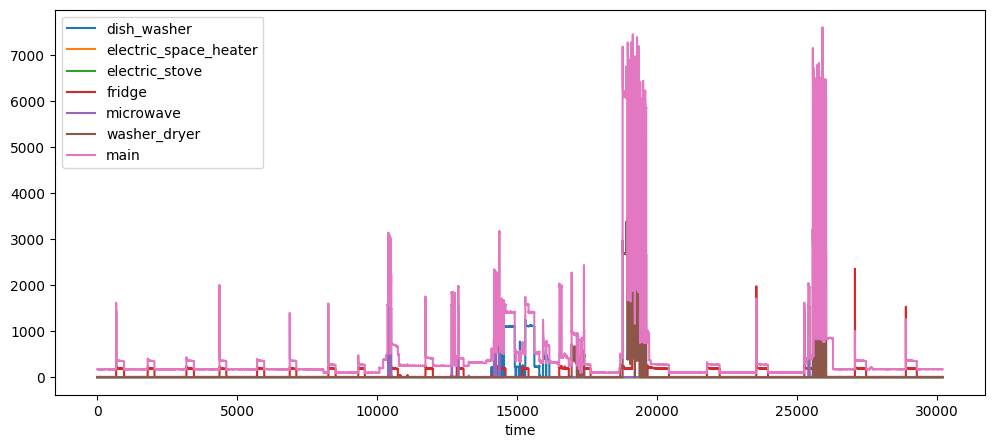

In [ ]:
df.set_index('time').plot(figsize = (12,5))

<Axes: xlabel='time'>

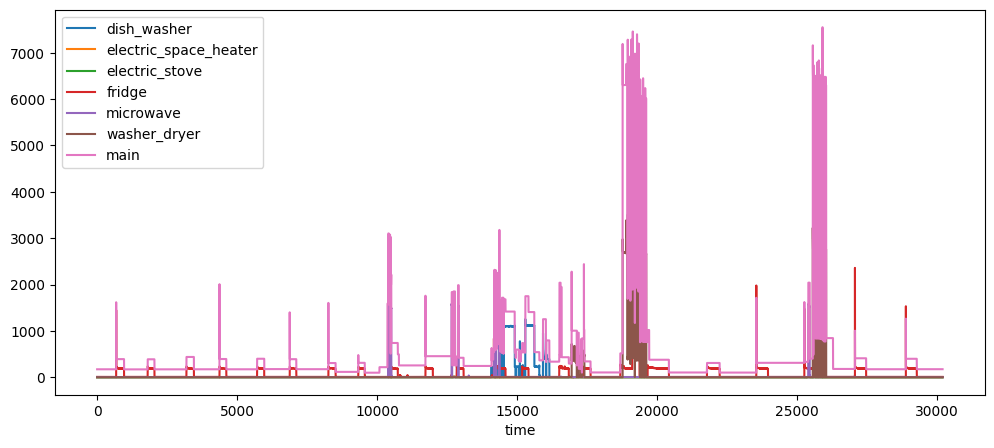

In [ ]:
def remove_bg(df, column_name):
    df_result = df.copy()
    list_derive = []
    bg_short_time_index = []

    for i in range(len(df) - 1):
        x = df[column_name].iloc[i + 1] - df[column_name].iloc[i]
        list_derive.append(x)

        if abs(x) < 120:
            bg_short_time_index.append(i)
            list_derive[-1] = 0

    for i in bg_short_time_index:
        df_result.at[i + 1, column_name] = df_result[column_name].iloc[i]

    return df_result

df2 = remove_bg(df,'main')

df2.set_index('time').plot(figsize = (12,5))

#Motif


<Axes: xlabel='Time ', ylabel='Power '>

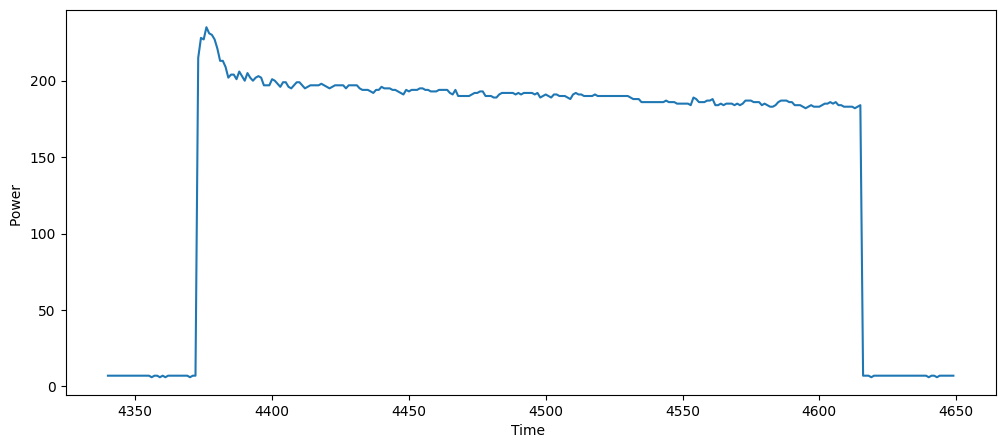

In [ ]:
motif_fridge =  df['fridge'].iloc[4340:4650]

plt.xlabel("Time ")
plt.ylabel("Power ")

motif_fridge.plot(figsize = (12,5))

<Axes: xlabel='Time ', ylabel='Power '>

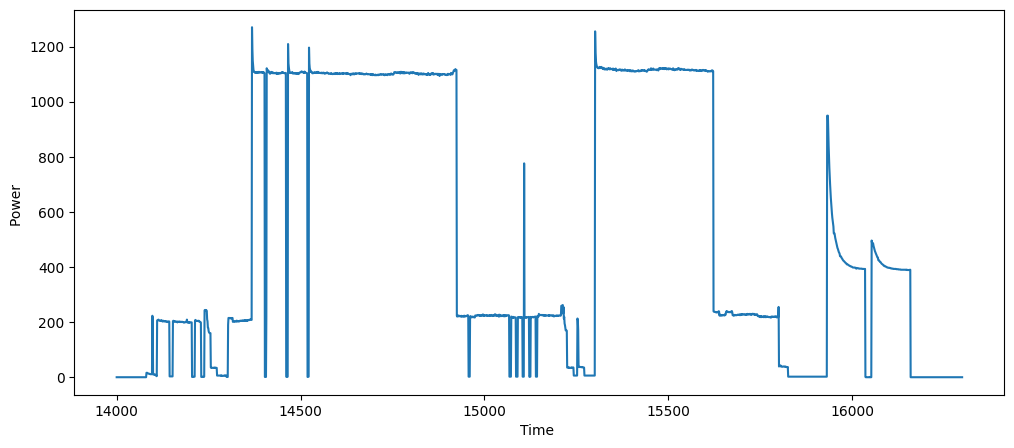

In [ ]:
motif_dish_washer = df['dish_washer'].iloc[14000:16300]
plt.xlabel("Time ")
plt.ylabel("Power ")
motif_dish_washer.plot(figsize = (12,5))

<Axes: xlabel='Time ', ylabel='Power '>

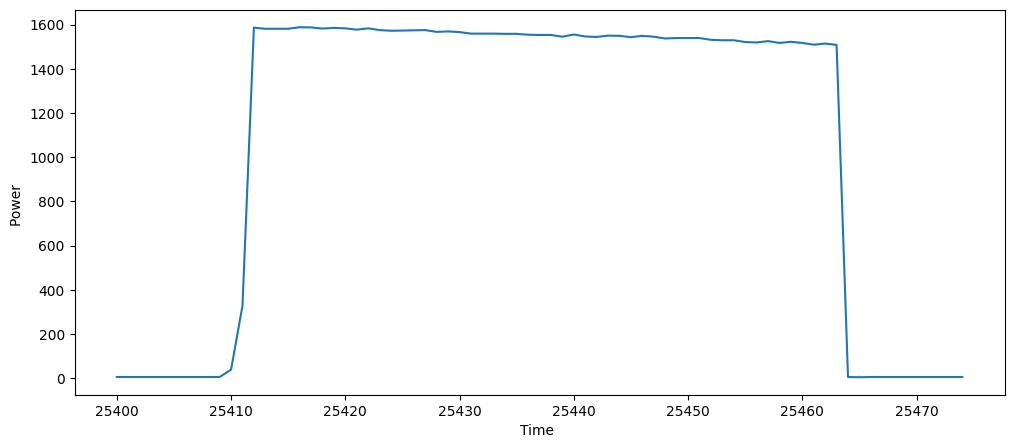

In [ ]:
motif_microwave = df['microwave'].iloc[25400:25475]
plt.xlabel("Time ")
plt.ylabel("Power ")
motif_microwave.plot(figsize = (12,5))

<Axes: xlabel='Time ', ylabel='Power '>

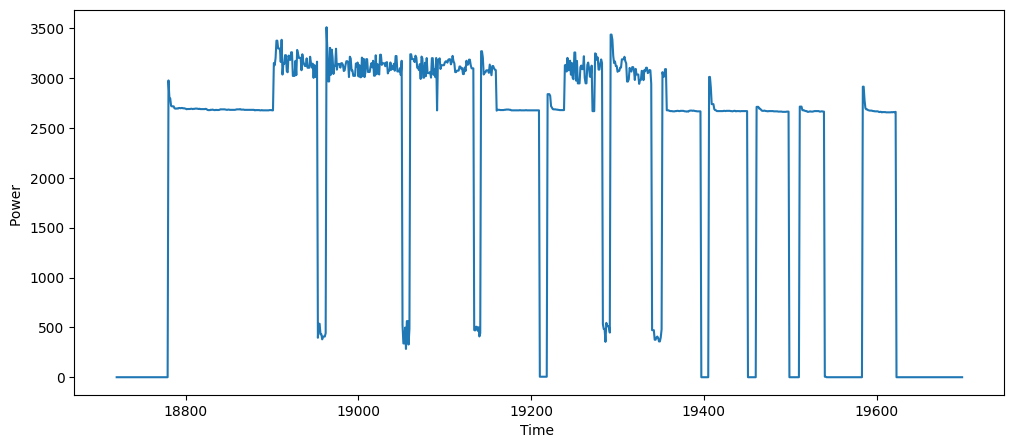

In [ ]:
motif_washer_dryer = df['washer_dryer'].iloc[18720:19700]
plt.xlabel("Time ")
plt.ylabel("Power ")
motif_washer_dryer.plot(figsize =(12,5))

#Fonction détermination temporelle

In [ ]:
#Fonction détermination temporelle par critère
def fridge(tableau):
    start=0
    indice = 0
    L=[]
    for i in range(len(tableau)-11):
        if tableau[i+5]-tableau[i]>160 and tableau[i+10]-tableau[i]<250:
            start=180
            indice = i
        elif tableau[i]-tableau[i+5]>160 and i-indice > 200:
            start=0
        L.append(start)

    for i in range(11):
        L.append(0)
    return L

def washer_dryer(tableau):
    L=[]
    start=0
    for i in range (len(tableau)):
        if tableau[i]>3500:
            start=2700
        else:
            start=0
        L.append(start)

    return L

def dish_washer(tableau):
    start=0
    L=[]
    for i in range(len(tableau)):
        if tableau[i]<1600 and tableau[i]>1400 and start == 0:
            start = 1000
        elif (tableau[i]<1400 or tableau[i]>1600) and start == 1000 :
            start = 0

        L.append(start)

    return L

def microwave(tableau):
    L=[0 for i in range(len(tableau))]
    S=[]

    for i in range(len(tableau)-5):
        if tableau[i+5]-tableau[i]>1200 and tableau[i+5]-tableau[i]<1800:
            start=i
            for j in range(i,min(i+500,len(tableau)-5)):
                if tableau[j]-tableau[j+5]>1200 and tableau[j]-tableau[j+5]<1800 and j-start<50 and j-start>10:
                    end=j
                    S.append(start)
                    S.append(end)
                    break

    for i in range(len(S)//2):
        for j in range(S[2*i],S[2*i+1]):
            L[j+5]=1500

    return L

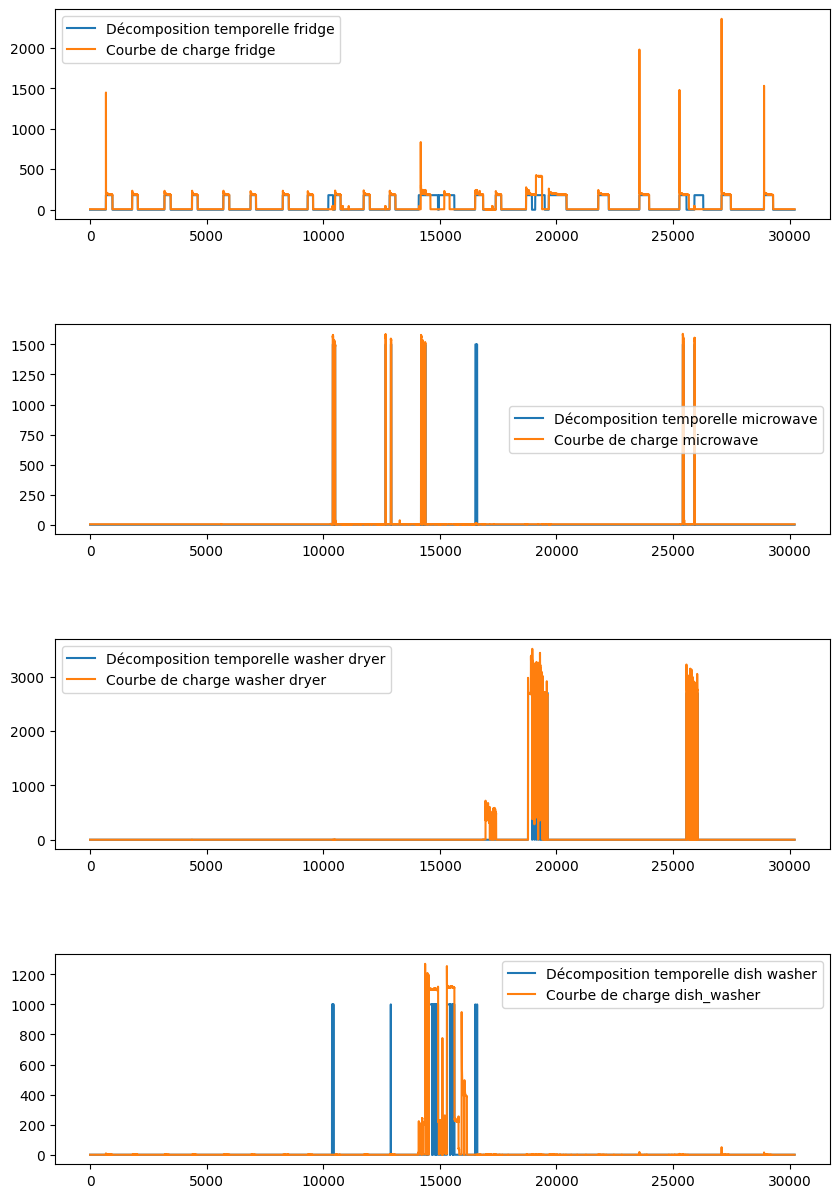

In [ ]:
#Axe abscisse
X=[i for i in range(len(fridge(df.main)))]


#Comparaison temporelle avec des appareils précis
fig, (ax1, ax2, ax3, ax4) = plt.subplots(4, 1,figsize=(10, 15))

ax1.plot(X,fridge(df.main),label='Décomposition temporelle fridge')
ax1.plot(X,df.fridge,label='Courbe de charge fridge')

ax2.plot(X,microwave(df.main),label='Décomposition temporelle microwave')
ax2.plot(X,df.microwave,label='Courbe de charge microwave')

ax3.plot(X,washer_dryer(df.main),label='Décomposition temporelle washer dryer')
ax3.plot(X,df.washer_dryer,label='Courbe de charge washer dryer')

ax4.plot(X,dish_washer(df.main),label='Décomposition temporelle dish washer')
ax4.plot(X,df.dish_washer,label='Courbe de charge dish_washer')

plt.subplots_adjust(hspace=0.5)

ax1.legend()
ax2.legend()
ax3.legend()
ax4.legend()

#Détermination temporelle

In [ ]:
# return une liste de tuple (x1,x2) avec x1 le début du motif et x2 la durée du motif
def index_broken_bar(tableau):
    a=0
    L=[]
    for i in range(len(tableau)):
        if tableau[i]>10 and a==0:
            L.append(i)
            a=1
        elif tableau[i]<10 and a==1:
            L.append(i)
            a=0

    tuple_list = []

    for i in range(0, len(L), 2):
        tuple_list.append((L[i], L[i+1]-L[i]))

    return tuple_list

Text(0.5, 1.0, 'Résultat Décomposition Temporelle')

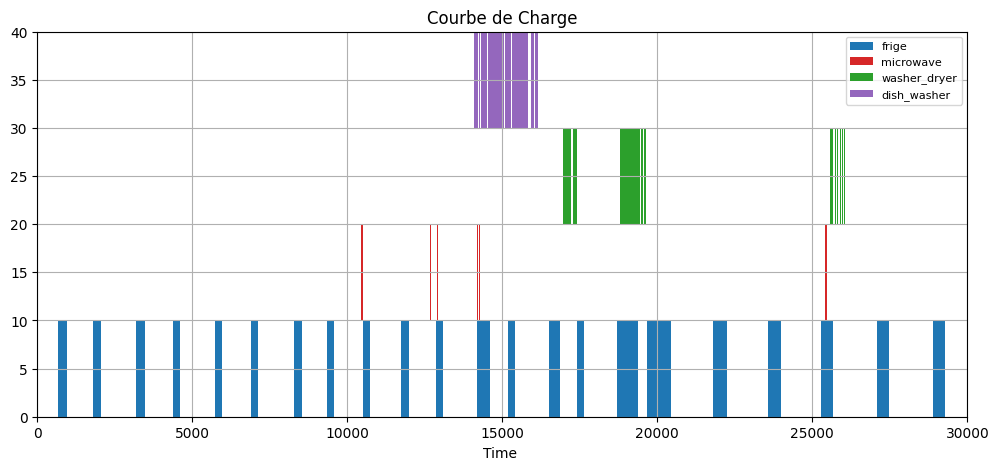

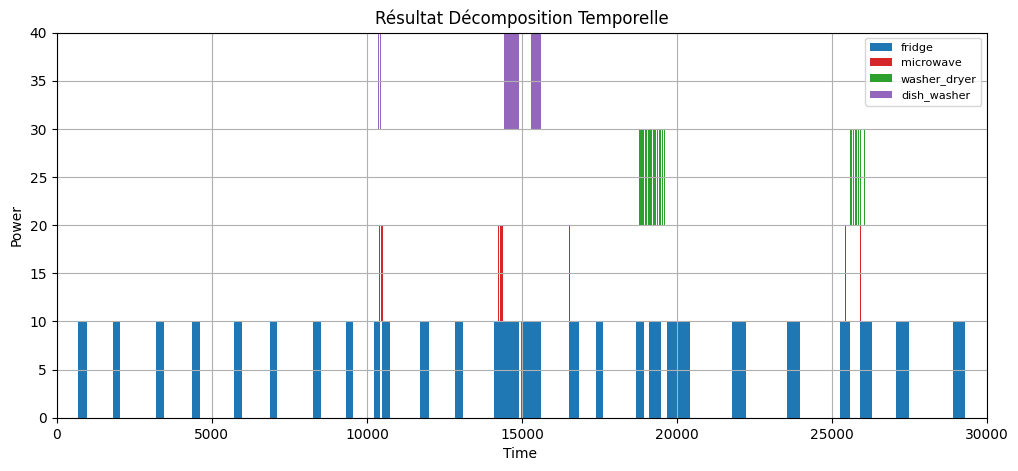

In [ ]:
# Figure sous la forme d'un diagramme de Gant
fig, gnt = plt.subplots(figsize=(12, 5))

gnt.set_ylim(0, 40)
gnt.set_xlim(0, 30000)

gnt.grid(True)


gnt.broken_barh(index_broken_bar(df.fridge), (0, 10),
                         facecolors ='tab:blue', label='frige')
gnt.broken_barh(index_broken_bar(df.microwave), (10, 10),
                         facecolors =('tab:red'),label='microwave')
gnt.broken_barh(index_broken_bar(df.washer_dryer), (20, 10),
                         facecolors =('tab:green'), label='washer_dryer')
gnt.broken_barh(index_broken_bar(df.dish_washer), (30, 10),
                         facecolors =('tab:purple'),label='dish_washer')

plt.xlabel("Time ")
plt.legend(fontsize=8)
plt.title('Courbe de Charge')


fig2, gnt2 = plt.subplots(figsize=(12, 5))

gnt2.set_ylim(0, 40)
gnt2.set_xlim(0, 30000)

gnt2.grid(True)


gnt2.broken_barh(index_broken_bar(fridge(df.main)), (0, 10),
                         facecolors ='tab:blue', label='fridge')
gnt2.broken_barh(index_broken_bar(microwave(df.main)), (10, 10),
                         facecolors =('tab:red'),label='microwave')
gnt2.broken_barh(index_broken_bar(washer_dryer(df.main)), (20, 10),
                         facecolors =('tab:green'), label='washer_dryer')
gnt2.broken_barh(index_broken_bar(dish_washer(df.main)), (30, 10),
                         facecolors =('tab:purple'),label='dish_washer')


plt.xlabel("Time ")
plt.ylabel("Power")
plt.legend(fontsize=8)
plt.title('Résultat Décomposition Temporelle')


In [ ]:
#Fonctions pour déterminer le taux de correspondance
def liste_comp(tableau):
    a=0
    L=[]
    for i in range(len(tableau)):
        if tableau[i]>10 and a==0:
            a=1
        elif tableau[i]<10 and a==1:
            a=0
        L.append(a)
    return L


def taux(tableau1, tableau2):
    S=0
    donnée = liste_comp(tableau1)
    decomp = liste_comp(tableau2)
    for i in range(len(donnée)):
        if donnée[i] == decomp[i]:
            S+=1
    return S/len(donnée)

print(f'Taux de précision fridge : {taux(df.fridge,fridge(df.main))*100:.2f}%')
print(f'Taux de précision microwave : {taux(df.microwave,microwave(df.main))*100:.2f}%')
print(f'Taux de précision dish washer : {taux(df.dish_washer,dish_washer(df.main))*100:.2f}%')
print(f'Taux de précision washer dryer : {taux(df.washer_dryer,washer_dryer(df.main))*100:.2f}%')

Taux de précision fridge : 93.45%
Taux de précision microwave : 99.43%
Taux de précision dish washer : 96.37%
Taux de précision washer dryer : 98.53%


#Machine Learning

## Fonctions d'attribution des classes

In [ ]:
#classification de toutes les combinaisons possibles
def classification(fridge,microwave,dishwasher,washerdryer):
    classeur = []
    seuil=12
    for i in range(len(fridge)):

        if fridge[i]<10 and microwave[i]<seuil and dishwasher[i]<seuil and washerdryer[i]<seuil:
            classeur.append(0)

        if fridge[i]>=seuil and microwave[i]<seuil and dishwasher[i]<seuil and washerdryer[i]<seuil:
            classeur.append(1)
        if fridge[i]<seuil and microwave[i]>=seuil and dishwasher[i]<seuil and washerdryer[i]<seuil:
            classeur.append(2)
        if fridge[i]<seuil and microwave[i]<seuil and dishwasher[i]>=seuil and washerdryer[i]<seuil:
            classeur.append(3)
        if fridge[i]<seuil and microwave[i]<seuil and dishwasher[i]<seuil and washerdryer[i]>=seuil:
            classeur.append(4)

        if fridge[i]>=seuil and microwave[i]>=seuil and dishwasher[i]<seuil and washerdryer[i]<seuil:
            classeur.append(5)
        if fridge[i]>=seuil and microwave[i]<seuil and dishwasher[i]>=seuil and washerdryer[i]<seuil:
            classeur.append(6)
        if fridge[i]>=seuil and microwave[i]<seuil and dishwasher[i]<seuil and washerdryer[i]>=seuil:
            classeur.append(7)
        if fridge[i]<seuil and microwave[i]>=seuil and dishwasher[i]>=seuil and washerdryer[i]<seuil:
            classeur.append(8)
        if fridge[i]<seuil and microwave[i]>=seuil and dishwasher[i]<seuil and washerdryer[i]>=seuil:
            classeur.append(9)
        if fridge[i]<seuil and microwave[i]<seuil and dishwasher[i]>=seuil and washerdryer[i]>=seuil:
            classeur.append(10)

        if fridge[i]>=seuil and microwave[i]>=seuil and dishwasher[i]>=seuil and washerdryer[i]<seuil:
            classeur.append(11)
        if fridge[i]>=seuil and microwave[i]>=seuil and dishwasher[i]<seuil and washerdryer[i]>=seuil:
            classeur.append(12)
        if fridge[i]<seuil and microwave[i]>=seuil and dishwasher[i]>=seuil and washerdryer[i]>=seuil:
            classeur.append(13)
        if fridge[i]>=seuil and microwave[i]<seuil and dishwasher[i]>=seuil and washerdryer[i]>=seuil:
            classeur.append(14)

        if fridge[i]>=seuil and microwave[i]>=seuil and dishwasher[i]>=seuil and washerdryer[i]>=seuil:
            classeur.append(15)

    return classeur

## Création des listes glissées

In [ ]:
X_train = df.main
X=[]

#liste aves les termes précédents et suivants pour prendre en compte les variations
for i in range(len(X_train)):
    # Indices des éléments précédents et suivants
    prev_indices = [i - 2, i - 1]
    next_indices = [i + 1,i + 2]

    # Créer une sous-liste en utilisant les indices et en remplaçant les indices hors limites par des zéros
    sub_list = [X_train[j] if 0 <= j < len(X_train) else 0 for j in prev_indices + [i] + next_indices]

    # Ajouter la sous-liste à la liste résultante
    X.append(sub_list)

X_1 = np.array(X,dtype=object)
y_1 = classification(df.fridge,df.microwave,df.dish_washer,df.washer_dryer)

## Data splitting and Training

In [ ]:
# Créer un modèle de régression logistique
model = LogisticRegression(max_iter=100000)

starting_time = time.time( )

# Diviser les données en ensembles d'entraînement et de test
X_train, X_test, y_train, y_test = train_test_split(X_1, y_1, test_size=0.2, random_state=42)

# Entraîner le modèle
model.fit(X_train, y_train)

training_time = time.time( ) - starting_time
print("Training time:",training_time)

Training time: 106.48752999305725


Pour save le modèle


In [ ]:
#Pour save le model
from google.colab import drive
drive.mount('/content/drive', force_remount=True)

# Enregistrez le modèle dans un fichier spécifique
with open('/content/drive/MyDrive/modèle.pkl', 'wb') as file:
    pickle.dump(model, file)

Mounted at /content/drive


## Results

Premier résultat avec une régression logistique

In [ ]:
# Faire des prédictions sur l'ensemble de test
y_pred = model.predict(X_test)

# Évaluer la précision du modèle
accuracy = accuracy_score(y_test, y_pred)
print(f'Précision du modèle : {accuracy * 100:.2f}%')

#Précision de la détermination temporrelle
y_base = classification(fridge(df.main),microwave(df.main),dish_washer(df.main),washer_dryer(df.main))
y_1 = classification(df.fridge,df.microwave,df.dish_washer,df.washer_dryer)
S=0

for i in range(len(y_base)-1):
    if y_base[i]==y_1[i]:
        S+=1

print(f'Précision détermination temporelle : {S/len(y_base)*100:.2f}%')

Précision du modèle : 72.94%
Précision détermination temporelle : 89.17%


#Modèle SVM : avec Préfiltrage et Normalisation




## Définition du modèle

In [ ]:
from sklearn.preprocessing import StandardScaler
from sklearn import svm

In [ ]:
def machine_learning(nbr, funct = 'poly', carac = 1000,seuil = 180 ,database = df, name_model = "modèle", save = False, taille = 0 ):

  X_train = database.main
  taille = len(X_train)
  X = []
  Y = []
  y_train1 = classification(database.fridge, database.microwave, database.dish_washer, database.washer_dryer)

  compteur_total = len(X_train)
  # Liste avec les termes précédents et suivants pour prendre en compte les variations
  for i in range(len(X_train)-1):
      if X_train[i] > seuil:
          # Indices des éléments précédents et suivants (de -30 à +30)
          prev_indices = [i - k for k in range(nbr, 0, -1)]  # de -30 à -1
          next_indices = [i + k for k in range(1, nbr+1)]  # de 1 à 30

          # Créer une sous-liste en utilisant les indices et en remplaçant les indices hors limites par des zéros
          sub_list = [X_train[j] if 0 <= j < len(X_train) else 0 for j in prev_indices + [i] + next_indices]

          # Ajouter la sous-liste à la liste résultante
          X.append(sub_list)
          Y.append(y_train1[i])


  X_train = np.array(X, dtype=object)
  y_train1 = np.array(Y)

  compteur = len(X_train)
  # Créer un modèle de régression logistique
  model = svm.SVC(kernel= funct , C=carac)

  # Diviser les données en ensembles d'entraînement et de test
  X_train, X_test, y_train, y_test = train_test_split(X_train, y_train1, test_size=0.2, random_state=42)

  # Normalisation des caractéristiques
  scaler = StandardScaler()
  X_train_scaled = scaler.fit_transform(X_train)
  X_test_scaled = scaler.transform(X_test)

  X_train_scaled = X_train_scaled[:taille]
  X_test_scaled = X_test_scaled[:taille]


  # Entraîner le modèle
  model.fit(X_train_scaled, y_train)

  if save :
    #Pour save le model
    from google.colab import drive
    drive.mount('/content/drive', force_remount=True)

   # Enregistrez le modèle dans un fichier spécifique
    with open(f'/content/drive/MyDrive/{name_model}.pkl', 'wb') as file:
      pickle.dump(model, file)


  # Faire des prédictions sur l'ensemble de test
  y_pred = model.predict(X_test_scaled)

  # Évaluer la précision du modèle
  accuracy = accuracy_score(y_test, y_pred)

  real_accuracy = (accuracy * compteur + (compteur_total - compteur))/compteur_total * 100

  return real_accuracy


## Choix des Hyperparamètres

Choix fait à la main, mais possibilité d'utiliser des outils comme gridsearchCV, hyperopt, MLFlow si on a accès à beaucoup de computation...

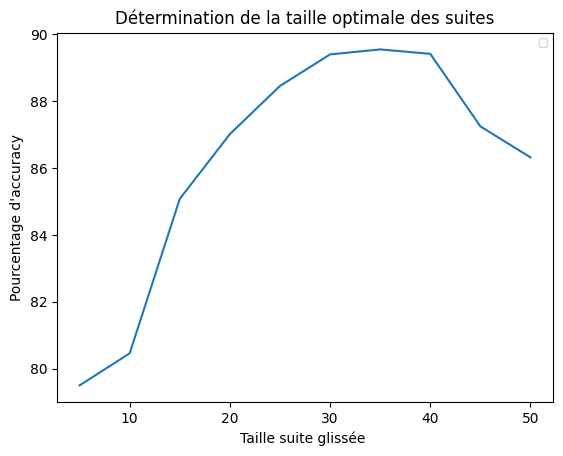

In [ ]:
X = list(range(5, 51, 5))
Y = [machine_learning(i) for i in X]

plt.plot(X,Y)
plt.xlabel("Taille suite glissée ")
plt.ylabel("Pourcentage d'accuracy")
plt.legend(fontsize=8)
plt.title('Détermination de la taille optimale des suites')
plt.show()

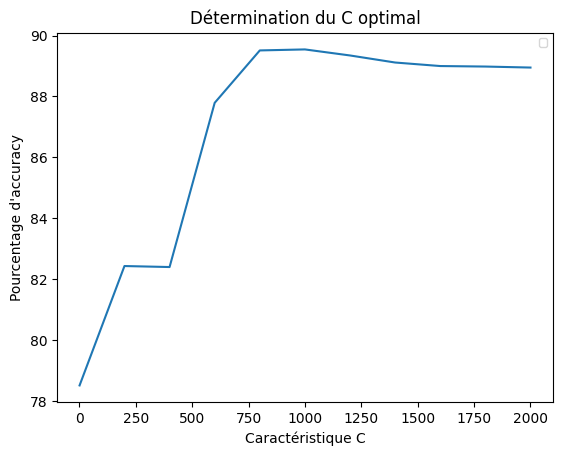

In [ ]:
X2 = [1, 200, 400, 600, 800, 1000, 1200, 1400, 1600, 1800, 2000]
Y2 = [machine_learning(35 , carac = i) for i in X2]

plt.xlabel("Caractéristique C")
plt.ylabel("Pourcentage d'accuracy")
plt.legend(fontsize=8)
plt.title('Détermination du C optimal')
plt.plot(X2,Y2)

In [ ]:
max = Y[6]

print(f'Précision max du modèle : {max:.2f}%')

Précision max du modèle : 89.54%


#Load already trained model

In [ ]:
# download dataset

if COLAB:
    download = drive2.CreateFile({'id': '1GQqWNP2BR3EQ7HqyCADvVBeGrcmDLkzL'})
    download.GetContentFile("final_model.pkl")

!ls -lrt

total 26564
drwxr-xr-x 1 root root     4096 Jun 13 13:28 sample_data
-rw-r--r-- 1 root root  1331494 Jun 15 03:22 data1.csv
-rw-r--r-- 1 root root  1022826 Jun 15 03:22 data_0.csv
-rw-r--r-- 1 root root  1130134 Jun 15 03:22 data_1.csv
-rw-r--r-- 1 root root  1230832 Jun 15 03:22 data_2.csv
-rw-r--r-- 1 root root  1331494 Jun 15 03:22 data_3.csv
-rw-r--r-- 1 root root  2489648 Jun 15 03:22 data_4.csv
-rw-r--r-- 1 root root  1210916 Jun 15 03:22 data_5.csv
-rw-r--r-- 1 root root  1607149 Jun 15 03:22 data_6.csv
-rw-r--r-- 1 root root  1424063 Jun 15 03:22 data_7.csv
-rw-r--r-- 1 root root  1117842 Jun 15 03:22 data_8.csv
-rw-r--r-- 1 root root  1476962 Jun 15 03:22 data_9.csv
drwx------ 5 root root     4096 Jun 15 03:25 drive
-rw-r--r-- 1 root root 11799123 Jun 15 03:44 final_model.pkl


In [ ]:
with open("final_model.pkl", 'rb') as file:
    final_model = pickle.load(file)

In [ ]:
def use_model_save(data,model_saved):
  X_train = data.main
  X = []
  Y = []
  y_train1 = classification(data.fridge, data.microwave, data.dish_washer, data.washer_dryer)

  compteur_total = len(X_train)

  # Liste avec les termes précédents et suivants pour prendre en compte les variations
  for i in range(len(X_train)-1):
      if X_train[i] > 20:
          # Indices des éléments précédents et suivants (de -30 à +30)
          prev_indices = [i - k for k in range(35, 0, -1)]  # de -30 à -1
          next_indices = [i + k for k in range(1, 35+1)]  # de 1 à 30

          # Créer une sous-liste en utilisant les indices et en remplaçant les indices hors limites par des zéros
          sub_list = [X_train[j] if 0 <= j < len(X_train) else 0 for j in prev_indices + [i] + next_indices]

          # Ajouter la sous-liste à la liste résultante
          X.append(sub_list)
          Y.append(y_train1[i])

  X = np.array(X, dtype=object)
  y = np.array(Y)

  compteur = len(X)

  # Normalisation des caractéristiquesf
  scaler = StandardScaler()
  X_scaled = scaler.fit_transform(X)
  # Faire des prédictions sur l'ensemble de test
  y_pred = model_saved.predict(X_scaled)

  # Évaluer la précision du modèle
  accuracy = accuracy_score(y, y_pred)

  real_accuracy = (accuracy * compteur + (compteur_total - compteur))/compteur_total * 100

  print(f'Précision du modèle : {real_accuracy :.2f}%')

#Avec hypothèses simplificatrices


## Création nouvelle base de données simplifiée

Création d'un nouveau "main" qui est égale à la somme des autres colonnes


In [ ]:
# Initialiser une liste pour stocker les DataFrames
dfs = []

# Lire les fichiers de data_0.csv à data_9.csv
for i in range(10):
    filename = f'data_{i}.csv'
    df = pd.read_csv(filename, names=headers)

    # Supprimer la première ligne de chaque DataFrame
    df = df.drop(0)

    # Ajouter le DataFrame modifié à la liste
    dfs.append(df)

# Concaténer tous les DataFrames dans un seul DataFrame
final_df = pd.concat(dfs, ignore_index=True)
final_df = final_df.drop('time', axis=1)

dfs_non_modifié = final_df

final_df = final_df.drop('main', axis=1)
final_df['main'] = final_df.sum(axis=1)

final_df



,dish_washer,electric_space_heater,electric_stove,fridge,microwave,washer_dryer,main
0,0.0,0.0,0.0,6.0,4.0,0.0,10.0
1,0.0,0.0,0.0,6.0,4.0,0.0,10.0
2,0.0,0.0,0.0,6.0,4.0,0.0,10.0
3,0.0,0.0,0.0,6.0,4.0,0.0,10.0
4,0.0,0.0,0.0,6.0,4.0,0.0,10.0
...,...,...,...,...,...,...,...
319499,0.0,0.0,0.0,6.0,4.0,0.0,10.0
319500,0.0,0.0,0.0,6.0,4.0,0.0,10.0
319501,0.0,0.0,0.0,6.0,4.0,0.0,10.0
319502,0.0,0.0,0.0,6.0,4.0,0.0,10.0


## Results

Précision avec machine learning


In [ ]:
Training = False

In [ ]:
if Training :
  print(machine_learning(35,seuil = 20,database =final_df, name_model = "final_model", save =True))

else:
  use_model_save(final_df,final_model)

Précision du modèle : 97.36%


Précision détermination temporelle

In [ ]:
#Précision de la détermination temporrelle
y_base = classification(fridge(final_df.main),microwave(final_df.main),dish_washer(final_df.main),washer_dryer(final_df.main))
y_1 = classification(final_df.fridge,final_df.microwave,final_df.dish_washer,final_df.washer_dryer)
S=0

for i in range(len(y_base)-1):
    if y_base[i]==y_1[i]:
        S+=1

print(f'Précision détermination temporelle : {S/len(y_base)*100:.2f}%')

Précision détermination temporelle : 89.77%


Précision du modèle avec hypothèses simplificatrices sur la base de données sans hypothèses

In [ ]:
use_model_save(dfs_non_modifié,final_model)

Précision du modèle : 21.93%


#Database Augmentation

## Création de data à la main

In [ ]:
#fonction qui modifie le motif selon largeur, hauteur
def modif_motif(largeur,hauteur,motif):
  motif_etire = np.interp(
        np.linspace(0,int(len(motif)*largeur),int(len(motif)*largeur)),
        np.linspace(0,int(len(motif)*largeur),len(motif)),
        motif.values
    )
  return hauteur * motif_etire;


<Axes: xlabel='Time', ylabel='Power'>

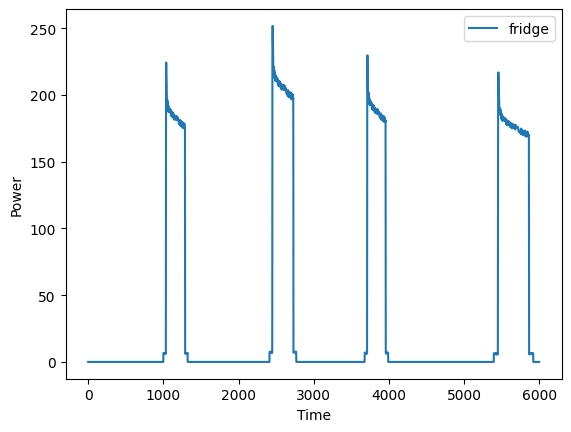

In [ ]:
import random
df_test = pd.DataFrame({'fridge': [0] * 6000})

#fonction qui à peut entrer les motifs sur une base de données
def base_créé(index_start,période,largeur,hauteur,motif,base_initiale,colonne):

  début=True
  compteur = 0

  for i in range(index_start, len(base_initiale)):
    if début == True:
        larg = random.uniform(largeur[0],largeur[1])
        haut = random.uniform(hauteur[0],hauteur[1])
        motif_choisi = modif_motif(larg,haut,motif)
        per =  int(random.uniform(période[0],période[1]))
        début=False

    if compteur < len(motif_choisi) and compteur >= 0:
      base_initiale.at[i, colonne] = motif_choisi[compteur]
      compteur +=1

    if compteur == len(motif_choisi):
      compteur = -per
      début = True

    if compteur<0:
      compteur +=1
      base_initiale.at[i, colonne] = 0

  return base_initiale;

base_créé(1000,[800,1500],[0.9,1.8],[0.9,1.1],motif_fridge,df_test,'fridge');

df_test.plot(xlabel = "Time", ylabel ='Power')

<Axes: xlabel='Time', ylabel='Power'>

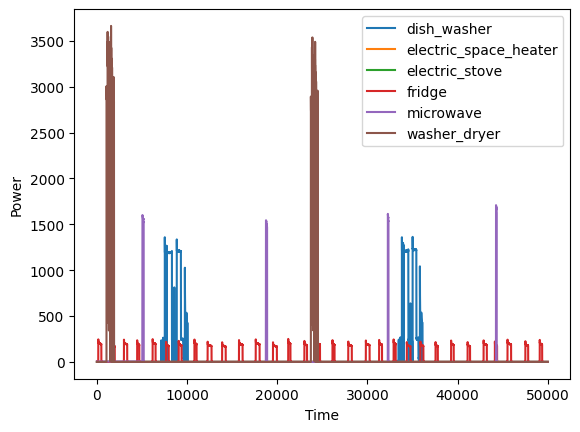

In [ ]:
df_créé = pd.DataFrame({'dish_washer': [0] * 50000,
                        'electric_space_heater': [0] * 50000,
                        'electric_stove': [0] * 50000,
                        'fridge': [6] * 50000,
                        'microwave': [4] * 50000,
                        'washer_dryer': [0] * 50000,})

base_créé(100,[800,1500],[0.9,1.8],[0.9,1.1],motif_fridge,df_créé,'fridge');
base_créé(5000,[8000,15000],[1,3],[0.9,1.1],motif_microwave,df_créé,'microwave');
base_créé(7000,[20000,25000],[0.9,1.8],[0.9,1.1],motif_dish_washer,df_créé,'dish_washer');
base_créé(1000,[20000,30000],[0.9,1.8],[0.9,1.1],motif_washer_dryer,df_créé,'washer_dryer');


df_créé.plot(xlabel = "Time", ylabel ='Power')

In [ ]:
df_créé['main'] = df_créé.sum(axis=1)

df_créé

,dish_washer,electric_space_heater,electric_stove,fridge,microwave,washer_dryer,main
0,0.0,0,0,6.0,4.0,0.0,10.0
1,0.0,0,0,6.0,4.0,0.0,10.0
2,0.0,0,0,6.0,4.0,0.0,10.0
3,0.0,0,0,6.0,4.0,0.0,10.0
4,0.0,0,0,6.0,4.0,0.0,10.0
...,...,...,...,...,...,...,...
49995,0.0,0,0,0.0,0.0,0.0,0.0
49996,0.0,0,0,0.0,0.0,0.0,0.0
49997,0.0,0,0,0.0,0.0,0.0,0.0
49998,0.0,0,0,0.0,0.0,0.0,0.0


## Results


In [ ]:
print(machine_learning(35,seuil = 20,database = df_créé, name_model = "model_créé", save =True))

Mounted at /content/drive
95.96026140407636


In [ ]:
# download dataset

if COLAB:
    download = drive2.CreateFile({'id': '1MyMQ40uzmQry5avhj153FPu71BvokI0m'})
    download.GetContentFile("model_créé.pkl")

!ls -lrt

total 29180
drwxr-xr-x 1 root root     4096 Jun 13 13:28 sample_data
-rw-r--r-- 1 root root  1331494 Jun 15 03:22 data1.csv
-rw-r--r-- 1 root root  1022826 Jun 15 03:22 data_0.csv
-rw-r--r-- 1 root root  1130134 Jun 15 03:22 data_1.csv
-rw-r--r-- 1 root root  1230832 Jun 15 03:22 data_2.csv
-rw-r--r-- 1 root root  1331494 Jun 15 03:22 data_3.csv
-rw-r--r-- 1 root root  2489648 Jun 15 03:22 data_4.csv
-rw-r--r-- 1 root root  1210916 Jun 15 03:22 data_5.csv
-rw-r--r-- 1 root root  1607149 Jun 15 03:22 data_6.csv
-rw-r--r-- 1 root root  1424063 Jun 15 03:22 data_7.csv
-rw-r--r-- 1 root root  1117842 Jun 15 03:22 data_8.csv
-rw-r--r-- 1 root root  1476962 Jun 15 03:22 data_9.csv
-rw-r--r-- 1 root root 11799123 Jun 15 03:44 final_model.pkl
drwx------ 5 root root     4096 Jun 15 03:59 drive
-rw-r--r-- 1 root root  2676622 Jun 15 03:59 model_créé.pkl


In [ ]:
with open("model_créé.pkl", 'rb') as file:
    model_créé = pickle.load(file)

In [ ]:
use_model_save(final_df,model_créé)

Précision du modèle : 73.85%
